# Practice Artificial neural network using Keras

---

## Data load
Titanic

In [1]:
import pandas as pd

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/datascienceschool/docker_rpython/master/data/titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Encoding
sex(One-Hot-Encoding), pclass(Label Encoding)

In [50]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
ohe = OneHotEncoder()
lb = LabelBinarizer()

In [51]:
lb.fit(df.loc[:, "sex"])
df["sex"] = lb.fit_transform(df["sex"])

In [69]:
import numpy as np
dfX_1 = pd.DataFrame(OneHotEncoder().fit_transform(np.array(df["pclass"])[:,np.newaxis]).toarray(), 
                     columns=["A_Class", "B_Class", "C_Class"])

In [70]:
df.loc[:, "age"].fillna(int(df["age"].mean()), inplace=True)
df.alone = df.alone.astype(int)

In [71]:
feature_name = ["sex", "age", "fare", "alone"]
dfX = df[feature_name]
dfY = df["survived"]

In [72]:
dfX_1 = dfX_1.astype(int)

In [73]:
dfX = pd.concat([dfX, dfX_1], axis=1)

## Split data(train, test)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, test_size=0.25, random_state=1)

In [75]:
X_train, X_test, y_train, y_test

(     sex    age      fare  alone  A_Class  B_Class  C_Class
 35     1  42.00   52.0000      0        1        0        0
 46     1  29.00   15.5000      0        0        0        1
 453    1  49.00   89.1042      0        1        0        0
 291    0  19.00   91.0792      0        1        0        0
 748    1  19.00   53.1000      0        1        0        0
 41     0  27.00   21.0000      0        0        1        0
 224    1  38.00   90.0000      0        1        0        0
 340    1   2.00   26.0000      0        0        1        0
 125    1  12.00   11.2417      0        0        0        1
 803    1   0.42    8.5167      0        0        0        1
 800    1  34.00   13.0000      1        0        1        0
 108    1  38.00    7.8958      1        0        0        1
 578    0  29.00   14.4583      0        0        0        1
 888    0  29.00   23.4500      0        0        0        1
 593    0  29.00    7.7500      0        0        0        1
 550    1  17.00  110.88

## Set Artifial neural network
2 layers

In [76]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import *

In [77]:
model = Sequential()

In [78]:
model.add(Dense(100, input_dim=7, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.add(Dense(100, activation="relu", kernel_initializer="glorot_uniform"))
model.add(Dense(1, activation="sigmoid", kernel_initializer="glorot_uniform"))
model.compile(optimizer=RMSprop(), loss='mse', metrics=["accuracy"])

In [79]:
model.layers

In [80]:
model_result = model.fit(X_train.values, y_train.values, epochs=150, batch_size=15, 
                         validation_data=(X_test.values, y_test.values), verbose=2)

Train on 668 samples, validate on 223 samples
Epoch 1/150
0s - loss: 0.2103 - acc: 0.6692 - val_loss: 0.2891 - val_acc: 0.5740
Epoch 2/150
0s - loss: 0.2094 - acc: 0.6856 - val_loss: 0.2476 - val_acc: 0.6143
Epoch 3/150
0s - loss: 0.2039 - acc: 0.6976 - val_loss: 0.2440 - val_acc: 0.6054
Epoch 4/150
0s - loss: 0.1995 - acc: 0.7111 - val_loss: 0.2350 - val_acc: 0.6323
Epoch 5/150
0s - loss: 0.2010 - acc: 0.7036 - val_loss: 0.2247 - val_acc: 0.6323
Epoch 6/150
0s - loss: 0.1968 - acc: 0.7021 - val_loss: 0.2368 - val_acc: 0.6413
Epoch 7/150
0s - loss: 0.1989 - acc: 0.7096 - val_loss: 0.2190 - val_acc: 0.6951
Epoch 8/150
0s - loss: 0.1912 - acc: 0.7126 - val_loss: 0.2246 - val_acc: 0.6278
Epoch 9/150
0s - loss: 0.1897 - acc: 0.7186 - val_loss: 0.2302 - val_acc: 0.6323
Epoch 10/150
0s - loss: 0.1874 - acc: 0.7141 - val_loss: 0.2080 - val_acc: 0.6547
Epoch 11/150
0s - loss: 0.1850 - acc: 0.7171 - val_loss: 0.2002 - val_acc: 0.6996
Epoch 12/150
0s - loss: 0.1768 - acc: 0.7500 - val_loss: 0.21

0s - loss: 0.1191 - acc: 0.8338 - val_loss: 0.1649 - val_acc: 0.7982
Epoch 106/150
0s - loss: 0.1192 - acc: 0.8368 - val_loss: 0.1538 - val_acc: 0.7892
Epoch 107/150
0s - loss: 0.1203 - acc: 0.8308 - val_loss: 0.1518 - val_acc: 0.7758
Epoch 108/150
0s - loss: 0.1196 - acc: 0.8338 - val_loss: 0.1519 - val_acc: 0.8117
Epoch 109/150
0s - loss: 0.1218 - acc: 0.8293 - val_loss: 0.1538 - val_acc: 0.7937
Epoch 110/150
0s - loss: 0.1197 - acc: 0.8413 - val_loss: 0.1516 - val_acc: 0.7892
Epoch 111/150
0s - loss: 0.1188 - acc: 0.8413 - val_loss: 0.1647 - val_acc: 0.7848
Epoch 112/150
0s - loss: 0.1165 - acc: 0.8398 - val_loss: 0.1611 - val_acc: 0.7713
Epoch 113/150
0s - loss: 0.1205 - acc: 0.8398 - val_loss: 0.1598 - val_acc: 0.7578
Epoch 114/150
0s - loss: 0.1210 - acc: 0.8249 - val_loss: 0.1569 - val_acc: 0.7713
Epoch 115/150
0s - loss: 0.1206 - acc: 0.8293 - val_loss: 0.1559 - val_acc: 0.7803
Epoch 116/150
0s - loss: 0.1176 - acc: 0.8413 - val_loss: 0.1654 - val_acc: 0.7803
Epoch 117/150
0s -

## Result

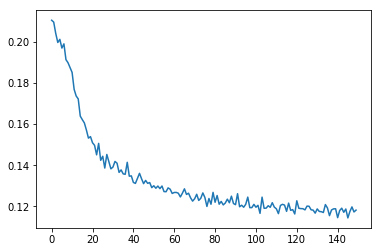

In [81]:
import matplotlib.pyplot as plt
plt.plot(model_result.history["loss"])
plt.show()

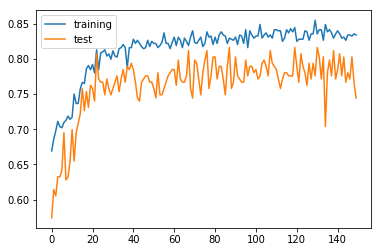

In [82]:
plt.plot(model_result.history["acc"], label="training")
plt.plot(model_result.history["val_acc"], label="test")
plt.legend()
plt.show()

In [83]:
y_predict = model.predict_classes(X_test.values)

 32/223 [===>..........................] - ETA: 0s

In [84]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.70      0.97      0.81       128
          1       0.91      0.44      0.60        95

avg / total       0.79      0.74      0.72       223

